In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv")

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [5]:
df_market_data.columns

Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data

features = [ 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

##subset of features
df_subset = df_market_data.loc[:, features]

#the scaler
scaler = StandardScaler()

scaler.fit(df_subset)

#do predictions and transformations
scaled = scaler.transform(df_subset)
scaled_df = pd.DataFrame(scaled, columns = features)

scaled_df["coin_id"] = df_market_data.coin_id

scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash


In [7]:
#checking the dataframe
scaled_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Data.

In [8]:
#defining prediction features
features_sub = scaled_df.loc[:, features]
features_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [9]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1,11))

In [10]:
# Create an empty list to store the inertia values
inertia_list = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    k_Model = KMeans(n_clusters=i, random_state=1)
    k_Model.fit(features_sub)
    
    inertia_list.append(k_Model.inertia_)


In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow = {"k": k_values, "inertia": inertia_list}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow)
elbow_df.head(5)

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


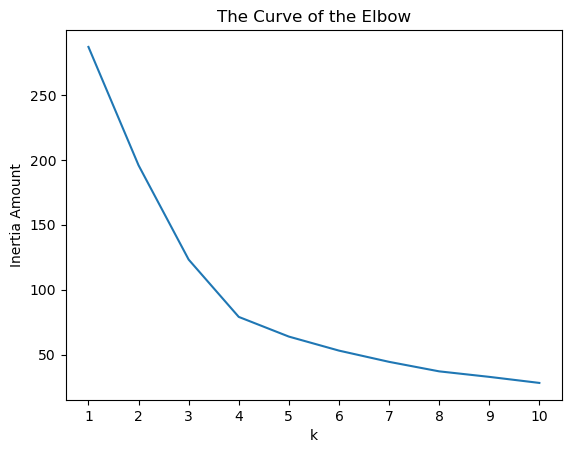

In [38]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df["k"],elbow_df["inertia"])
plt.title("The Curve of the Elbow")
plt.xticks(elbow_df["k"])
plt.ylabel("Inertia Amount")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** I think 4 is the best value for k.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [39]:
# Initialize the K-Means model using the best value for k
k_Model2 = KMeans(n_clusters = 4, random_state = 1)

In [41]:
# Fit the K-Means model using the scaled data
k_Model2.fit(features_sub)

KMeans(n_clusters=4, random_state=1)

In [42]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predict = k_Model2.predict(features_sub)

# Print the resulting array of cluster values.
print(predict)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [44]:
# Create a copy of the DataFrame
copy_df = scaled_df.copy()
copy_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash


In [45]:
# Add a new column to the DataFrame with the predicted clusters
copy_df["predicted clusters"] = predict

# Display sample data
copy_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_id,predicted clusters
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,2
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum,2
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether,0
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple,0
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash,2


In [54]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

copy_df.hvplot.scatter(
    width = 1000,
    height = 500,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted clusters",
    hover_cols="coin_id"
)

:NdOverlay   [predicted clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.


In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [22]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11


In [24]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [25]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialize the K-Means model using the best value for k


In [28]:
# Fit the K-Means model using the PCA data

In [29]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [30]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [31]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [32]:
# Composite plot to contrast the Elbow curves

In [33]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 